In [4]:
import numpy as np
import matplotlib.pyplot as plt


def linear_to_dB(power_ratio):
    """
    Converts linear power ratio (P2/P1) to dB.
    """
    return 10 * np.log10(power_ratio)


def dB_to_linear(dB_value):
    """
    Converts dB to linear power ratio.
    """
    return 10 ** (dB_value / 10)


def mW_to_dBm(power_mW):
    """
    Converts power in mW to dBm.
    """
    return 10 * np.log10(power_mW)


def dBm_to_mW(dBm_value):
    """
    Converts dBm to mW.
    """
    return 10 ** (dBm_value / 10)


def dB_per_m_to_dB_per_cm(alpha_dB_per_m):
    """
    Converts attenuation from dB/m to dB/cm.
    """
    return alpha_dB_per_m / 100


def dB_per_cm_to_dB_per_m(alpha_dB_per_cm):
    """
    Converts attenuation from dB/cm to dB/m.
    """
    return alpha_dB_per_cm * 100


# Example Usage

print("====== Example Conversions ======\n")

# Example 1: Linear Power Ratio → dB
P2 = 0.25
P1 = 1.0
ratio = P2 / P1

loss_dB = linear_to_dB(ratio)

print(f"Linear power ratio = {ratio}")
print(f"Power ratio in dB = {loss_dB:.3f} dB\n")

# Example 2: Power in mW → dBm → mW
power_mW = 2.0
power_dBm = mW_to_dBm(power_mW)
power_mW_back = dBm_to_mW(power_dBm)

print(f"{power_mW} mW = {power_dBm:.3f} dBm")
print(f"{power_dBm:.3f} dBm = {power_mW_back:.3f} mW\n")

# Example 3: Attenuation conversion
alpha_dB_per_cm = 2.0
alpha_dB_per_m = dB_per_cm_to_dB_per_m(alpha_dB_per_cm)

print(f"{alpha_dB_per_cm} dB/cm = {alpha_dB_per_m:.2f} dB/m")

alpha_dB_per_cm_back = dB_per_m_to_dB_per_cm(alpha_dB_per_m)

print(f"{alpha_dB_per_m:.2f} dB/m = {alpha_dB_per_cm_back:.3f} dB/cm\n")

# Example 4: Full Link Example
print("====== Link Budget Example ======")

Pin_mW = 1.0
Pout_mW = 0.32

IL_dB = linear_to_dB(Pin_mW / Pout_mW)
Pin_dBm = mW_to_dBm(Pin_mW)
Pout_dBm = mW_to_dBm(Pout_mW)

print(f"Insertion Loss = {IL_dB:.3f} dB")
print(f"Input Power = {Pin_dBm:.3f} dBm")
print(f"Output Power = {Pout_dBm:.3f} dBm")


====== Example Conversions ======

Linear power ratio = 0.25
Power ratio in dB = -6.021 dB

2.0 mW = 3.010 dBm
3.010 dBm = 2.000 mW

2.0 dB/cm = 200.00 dB/m
200.00 dB/m = 2.000 dB/cm

====== Link Budget Example ======
Insertion Loss = 4.949 dB
Input Power = 0.000 dBm
Output Power = -4.949 dBm


Insertion Loss values (dB):
L = 0.20 cm  -->  IL = 3.188 dB
L = 0.50 cm  -->  IL = 3.872 dB
L = 1.00 cm  -->  IL = 4.949 dB
L = 2.00 cm  -->  IL = 6.778 dB

Fitted Parameters:
Propagation loss (alpha) = 1.982 dB/cm
Length-independent loss (IL0) = 2.864 dB


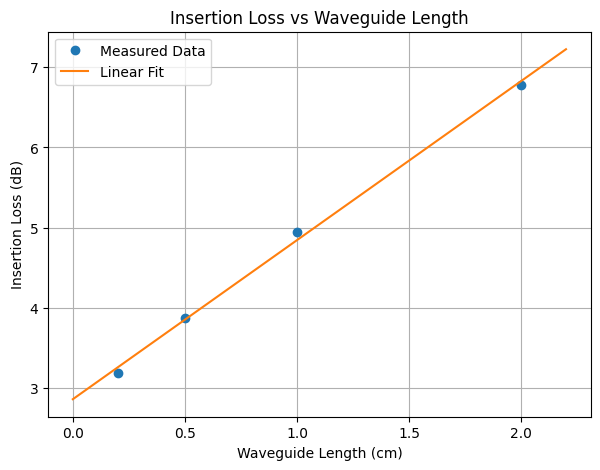

In [5]:

# Given Data
Pin_mW = 1.0

length_mm = np.array([2, 5, 10, 20])
length_cm = length_mm / 10.0

Pout_mW = np.array([480, 410, 320, 210]) / 1000.0  # convert μW to mW

# Compute Insertion Loss (dB)
IL_dB = 10 * np.log10(Pin_mW / Pout_mW)

# Linear Regression
# IL(dB) = IL0 + alpha * L(cm)
coefficients = np.polyfit(length_cm, IL_dB, 1)

alpha = coefficients[0]      # slope (dB/cm)
IL0 = coefficients[1]        # intercept (dB)

# Generate fit line
L_fit = np.linspace(0, 2.2, 200)
IL_fit = alpha * L_fit + IL0

# Print Results
print("Insertion Loss values (dB):")
for L, IL in zip(length_cm, IL_dB):
    print(f"L = {L:.2f} cm  -->  IL = {IL:.3f} dB")

print("\nFitted Parameters:")
print(f"Propagation loss (alpha) = {alpha:.3f} dB/cm")
print(f"Length-independent loss (IL0) = {IL0:.3f} dB")


# Plot
plt.figure(figsize=(7,5))
plt.plot(length_cm, IL_dB, 'o', label='Measured Data')
plt.plot(L_fit, IL_fit, '-', label='Linear Fit')

plt.xlabel("Waveguide Length (cm)")
plt.ylabel("Insertion Loss (dB)")
plt.title("Insertion Loss vs Waveguide Length")
plt.legend()
plt.grid(True)

plt.show()



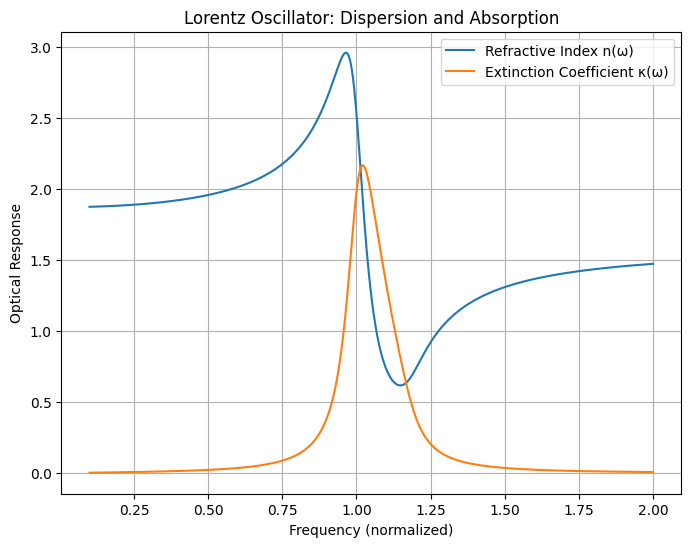

In [6]:

# Lorentz Oscillator Parameters

epsilon_inf = 2.5       # High-frequency permittivity
omega_0 = 1.0           # Resonance frequency (normalized units)
gamma = 0.1             # Damping constant
f = 1.0                 # Oscillator strength

# Frequency range
omega = np.linspace(0.1, 2.0, 2000)

# Lorentz Model: Complex Permittivity
# ε(ω) = ε_inf + f / (ω0^2 - ω^2 - iγω)

epsilon_complex = epsilon_inf + f / (omega_0**2 - omega**2 - 1j*gamma*omega)

# Extract real and imaginary parts
epsilon_real = np.real(epsilon_complex)
epsilon_imag = np.imag(epsilon_complex)

# Complex Refractive Index
# ñ = sqrt(ε)

n_complex = np.sqrt(epsilon_complex)
n = np.real(n_complex)       # Dispersion
kappa = np.imag(n_complex)   # Absorption

# Plot Results

plt.figure(figsize=(8,6))

plt.plot(omega, n, label="Refractive Index n(ω)")
plt.plot(omega, kappa, label="Extinction Coefficient κ(ω)")

plt.xlabel("Frequency (normalized)")
plt.ylabel("Optical Response")
plt.title("Lorentz Oscillator: Dispersion and Absorption")
plt.legend()
plt.grid(True)

plt.show()